In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
df_players = pd.read_csv("C:/Data Science/football/players_clean.csv")
df_stats = pd.read_csv("C:/Data Science/football/stats_clean.csv")
pd.set_option('display.max_columns', None)
df_players.head()

,player_id,player_name,date_of_birth,nationality,position,preferred_foot,height_cm,current_club,league
0,1,Erling Haaland,2000-07-21,Norway,ST,Left,195,Manchester City,Premier League
1,2,Kylian Mbappé,1998-12-20,France,CF,Right,178,Real Madrid,LaLiga
2,3,Jude Bellingham,2003-06-29,England,AM,Right,186,Real Madrid,LaLiga
3,4,Vinicius Junior,2000-07-12,Brazil,LW,Right,176,Real Madrid,LaLiga
4,5,Harry Kane,1993-07-28,England,CF,Right,188,Bayern Munich,Bundesliga


In [2]:
len(df_players)

30

In [3]:
df_stats.head()

,player_id,season,matches_played,minutes_played,goals,assists,xg,xa
0,1,2023-2024,45,3745,38,6,41.2,4.5
1,2,2023-2024,48,3869,44,10,39.5,8.2
2,3,2023-2024,42,3644,23,13,18.4,9.1
3,4,2023-2024,39,3084,24,11,19.8,10.2
4,5,2023-2024,45,3943,44,12,40.1,8.5


In [4]:
df_stats["player_id"] = df_stats["player_id"].astype(int)

In [5]:
len(df_stats)

30

In [6]:
#merging the 2 tables on player id
df_info = df_players.merge(df_stats, on="player_id", how='left')
df_info

,player_id,player_name,date_of_birth,nationality,position,preferred_foot,height_cm,current_club,league,season,matches_played,minutes_played,goals,assists,xg,xa
0,1,Erling Haaland,2000-07-21,Norway,ST,Left,195,Manchester City,Premier League,2023-2024,45,3745,38,6,41.2,4.5
1,2,Kylian Mbappé,1998-12-20,France,CF,Right,178,Real Madrid,LaLiga,2023-2024,48,3869,44,10,39.5,8.2
2,3,Jude Bellingham,2003-06-29,England,AM,Right,186,Real Madrid,LaLiga,2023-2024,42,3644,23,13,18.4,9.1
3,4,Vinicius Junior,2000-07-12,Brazil,LW,Right,176,Real Madrid,LaLiga,2023-2024,39,3084,24,11,19.8,10.2
4,5,Harry Kane,1993-07-28,England,CF,Right,188,Bayern Munich,Bundesliga,2023-2024,45,3943,44,12,40.1,8.5
5,6,Rodri,1996-06-22,Spain,DM,Right,191,Manchester City,Premier League,2023-2024,50,4325,9,14,6.5,7.8
6,7,Bukayo Saka,2001-09-05,England,RW,Left,178,Arsenal,Premier League,2023-2024,47,3982,20,14,17.2,12.5
7,8,Phil Foden,2000-05-28,England,RW,Left,171,Manchester City,Premier League,2023-2024,53,4277,27,12,19.4,10.1
8,9,Jamal Musiala,2003-02-26,Germany,AM,Right,184,Bayern Munich,Bundesliga,2023-2024,38,2855,12,8,10.5,6.2
9,10,Florian Wirtz,2003-05-03,Germany,AM,Right,177,Bayer Leverkusen,Bundesliga,2023-2024,49,3899,18,20,14.8,16.5


In [7]:
#creating a pivot table to display club goals
pivot_goals = pd.pivot_table(df_info,index="current_club",values="goals",aggfunc="sum")
pivot_goals

,goals
current_club,
AC Milan,15
Arsenal,40
Barcelona,11
Bayer Leverkusen,18
Bayern Munich,59
Chelsea,25
Galatasaray,17
Inter Milan,27
Liverpool,32


In [8]:
#creating a pivot table to show how many goals have the diffrent nationalities in each club
pivot_nationality = pd.pivot_table(df_info,index=["current_club","nationality"],values="goals",aggfunc="sum")
pivot_nationality

goals
current_club        nationality       
AC Milan            Portugal        15
Arsenal             England         27
                    France           2
                    Norway          11
Barcelona           Spain           11
Bayer Leverkusen    Germany         18
Bayern Munich       Canada           3
                    England         44
                    Germany         12
Chelsea             England         25
Galatasaray         Nigeria         17
Inter Milan         Argentina       27
Liverpool           Brazil           0
                    Egypt           25
                    England          3
                    Netherlands      4
Manchester City     England         27
                    Norway          38
                    Portugal         0
                    Spain            9
Manchester United   Portugal        15
Paris Saint-Germain Morocco          5
Real Madrid         Belgium          0
                    Brazil          24
                    England         23
                    France          44
                    Uruguay          3
Tottenham Hotspur   South Korea     17

In [9]:
#creating a func to calculate each player age
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month,  born.day))

    
df_info["Age"] = df_info["date_of_birth"].apply(age)
display(df_info)

,player_id,player_name,date_of_birth,nationality,position,preferred_foot,height_cm,current_club,league,season,matches_played,minutes_played,goals,assists,xg,xa,Age
0,1,Erling Haaland,2000-07-21,Norway,ST,Left,195,Manchester City,Premier League,2023-2024,45,3745,38,6,41.2,4.5,25
1,2,Kylian Mbappé,1998-12-20,France,CF,Right,178,Real Madrid,LaLiga,2023-2024,48,3869,44,10,39.5,8.2,27
2,3,Jude Bellingham,2003-06-29,England,AM,Right,186,Real Madrid,LaLiga,2023-2024,42,3644,23,13,18.4,9.1,22
3,4,Vinicius Junior,2000-07-12,Brazil,LW,Right,176,Real Madrid,LaLiga,2023-2024,39,3084,24,11,19.8,10.2,25
4,5,Harry Kane,1993-07-28,England,CF,Right,188,Bayern Munich,Bundesliga,2023-2024,45,3943,44,12,40.1,8.5,32
5,6,Rodri,1996-06-22,Spain,DM,Right,191,Manchester City,Premier League,2023-2024,50,4325,9,14,6.5,7.8,29
6,7,Bukayo Saka,2001-09-05,England,RW,Left,178,Arsenal,Premier League,2023-2024,47,3982,20,14,17.2,12.5,24
7,8,Phil Foden,2000-05-28,England,RW,Left,171,Manchester City,Premier League,2023-2024,53,4277,27,12,19.4,10.1,25
8,9,Jamal Musiala,2003-02-26,Germany,AM,Right,184,Bayern Munich,Bundesliga,2023-2024,38,2855,12,8,10.5,6.2,22
9,10,Florian Wirtz,2003-05-03,Germany,AM,Right,177,Bayer Leverkusen,Bundesliga,2023-2024,49,3899,18,20,14.8,16.5,22


In [10]:
df_info["current_club"].value_counts()

current_club
Real Madrid            5
Manchester City        4
Arsenal                4
Liverpool              4
Bayern Munich          3
Barcelona              2
Bayer Leverkusen       1
Inter Milan            1
Galatasaray            1
Chelsea                1
AC Milan               1
Paris Saint-Germain    1
Manchester United      1
Tottenham Hotspur      1
Name: count, dtype: int64

In [11]:
set(df_info["current_club"])

{'AC Milan',
 'Arsenal',
 'Barcelona',
 'Bayer Leverkusen',
 'Bayern Munich',
 'Chelsea',
 'Galatasaray',
 'Inter Milan',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Paris Saint-Germain',
 'Real Madrid',
 'Tottenham Hotspur'}

In [12]:
# dictionary that maps club to country 
team_to_country_dict = {
    "Manchester City": "England",
    'AC Milan': "Italy",
 'Arsenal': "England",
 'Barcelona': "Spain",
 'Bayer Leverkusen': "Germany",
 'Bayern Munich': "Germany",
 'Chelsea': "England",
 'Galatasaray': "Turkey",
 'Inter Milan': "Italy",
 'Liverpool': "England",
 'Manchester United': "England",
 'Paris Saint-Germain': "France",
 'Real Madrid': "Spain",
 'Tottenham Hotspur': "England"
}

In [13]:
df_info["club_country"] = df_info["current_club"].map(team_to_country_dict)

In [14]:
def team_country(x):
    return team_to_country_dict.get(x)
df_info["ClubCountry"] = df_info["current_club"].apply(team_country)

In [15]:
# player initials from name
def initials(name):
    return ' '.join(word[0].upper() + "." for word in name.split())
df_info["initials"] = df_info["player_name"].apply(initials)

In [16]:
df_info.head()

,player_id,player_name,date_of_birth,nationality,position,preferred_foot,height_cm,current_club,league,season,matches_played,minutes_played,goals,assists,xg,xa,Age,club_country,ClubCountry,initials
0,1,Erling Haaland,2000-07-21,Norway,ST,Left,195,Manchester City,Premier League,2023-2024,45,3745,38,6,41.2,4.5,25,England,England,E. H.
1,2,Kylian Mbappé,1998-12-20,France,CF,Right,178,Real Madrid,LaLiga,2023-2024,48,3869,44,10,39.5,8.2,27,Spain,Spain,K. M.
2,3,Jude Bellingham,2003-06-29,England,AM,Right,186,Real Madrid,LaLiga,2023-2024,42,3644,23,13,18.4,9.1,22,Spain,Spain,J. B.
3,4,Vinicius Junior,2000-07-12,Brazil,LW,Right,176,Real Madrid,LaLiga,2023-2024,39,3084,24,11,19.8,10.2,25,Spain,Spain,V. J.
4,5,Harry Kane,1993-07-28,England,CF,Right,188,Bayern Munich,Bundesliga,2023-2024,45,3943,44,12,40.1,8.5,32,Germany,Germany,H. K.


In [17]:
df_info.shape

(30, 20)

In [18]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_id       30 non-null     int64  
 1   player_name     30 non-null     object 
 2   date_of_birth   30 non-null     object 
 3   nationality     30 non-null     object 
 4   position        30 non-null     object 
 5   preferred_foot  30 non-null     object 
 6   height_cm       30 non-null     int64  
 7   current_club    30 non-null     object 
 8   league          30 non-null     object 
 9   season          30 non-null     object 
 10  matches_played  30 non-null     int64  
 11  minutes_played  30 non-null     int64  
 12  goals           30 non-null     int64  
 13  assists         30 non-null     int64  
 14  xg              30 non-null     float64
 15  xa              30 non-null     float64
 16  Age             30 non-null     int64  
 17  club_country    30 non-null     objec

In [19]:
df_info.isnull().sum()

player_id         0
player_name       0
date_of_birth     0
nationality       0
position          0
preferred_foot    0
height_cm         0
current_club      0
league            0
season            0
matches_played    0
minutes_played    0
goals             0
assists           0
xg                0
xa                0
Age               0
club_country      0
ClubCountry       0
initials          0
dtype: int64

In [20]:
df_info.isnull()

,player_id,player_name,date_of_birth,nationality,position,preferred_foot,height_cm,current_club,league,season,matches_played,minutes_played,goals,assists,xg,xa,Age,club_country,ClubCountry,initials
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df_info["nationality"].nunique()

16

In [22]:
df_info.head()

,player_id,player_name,date_of_birth,nationality,position,preferred_foot,height_cm,current_club,league,season,matches_played,minutes_played,goals,assists,xg,xa,Age,club_country,ClubCountry,initials
0,1,Erling Haaland,2000-07-21,Norway,ST,Left,195,Manchester City,Premier League,2023-2024,45,3745,38,6,41.2,4.5,25,England,England,E. H.
1,2,Kylian Mbappé,1998-12-20,France,CF,Right,178,Real Madrid,LaLiga,2023-2024,48,3869,44,10,39.5,8.2,27,Spain,Spain,K. M.
2,3,Jude Bellingham,2003-06-29,England,AM,Right,186,Real Madrid,LaLiga,2023-2024,42,3644,23,13,18.4,9.1,22,Spain,Spain,J. B.
3,4,Vinicius Junior,2000-07-12,Brazil,LW,Right,176,Real Madrid,LaLiga,2023-2024,39,3084,24,11,19.8,10.2,25,Spain,Spain,V. J.
4,5,Harry Kane,1993-07-28,England,CF,Right,188,Bayern Munich,Bundesliga,2023-2024,45,3943,44,12,40.1,8.5,32,Germany,Germany,H. K.


In [23]:
df_info.groupby("nationality")[["Age", "height_cm"]].mean().sort_values("Age", ascending=True)

,Age,height_cm
nationality,,
Germany,22.000000,180.500000
Spain,23.333333,181.666667
Canada,25.000000,185.000000
France,25.500000,185.000000
England,25.714286,181.142857
Norway,26.000000,186.500000
Morocco,27.000000,181.000000
Nigeria,27.000000,186.000000
Uruguay,27.000000,182.000000


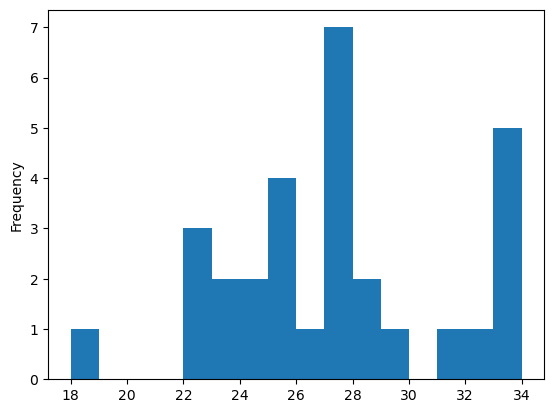

In [24]:
df_info["Age"].plot(kind='hist', bins = 16)
plt.show()

In [25]:
df_info["goals"].sum()

np.int64(449)

In [26]:
df_info.groupby("position")["goals"].sum().sort_values()

position
GK      0
LB      3
CB      6
CM      7
RB      8
DM     16
ST     38
LW     56
RW     79
AM    104
CF    132
Name: goals, dtype: int64

In [27]:
df_info["current_club"].value_counts().nlargest(5)

current_club
Real Madrid        5
Manchester City    4
Arsenal            4
Liverpool          4
Bayern Munich      3
Name: count, dtype: int64

In [42]:
goals_club = df_info.groupby(["current_club", "season"])["goals"].sum().reset_index()
goals_club.sort_values("goals", ascending=False).head(20)

,current_club,season,goals
12,Real Madrid,2023-2024,94
9,Manchester City,2023-2024,74
4,Bayern Munich,2023-2024,59
1,Arsenal,2023-2024,40
8,Liverpool,2023-2024,32
7,Inter Milan,2023-2024,27
5,Chelsea,2023-2024,25
3,Bayer Leverkusen,2023-2024,18
6,Galatasaray,2023-2024,17
13,Tottenham Hotspur,2023-2024,17


In [29]:
performance = df_info[(df_info["goals"]>10) & (df_info["assists"]>5)]
performance[["player_name","goals","assists"]]

,player_name,goals,assists
0,Erling Haaland,38,6
1,Kylian Mbappé,44,10
2,Jude Bellingham,23,13
3,Vinicius Junior,24,11
4,Harry Kane,44,12
6,Bukayo Saka,20,14
7,Phil Foden,27,12
8,Jamal Musiala,12,8
9,Florian Wirtz,18,20
11,Martin Ødegaard,11,11


In [30]:
df_info.groupby("Age")[["goals","assists","minutes_played"]].mean()

,goals,assists,minutes_played
Age,,,
18,7.000000,10.000000,2955.000000
22,17.666667,13.666667,3466.000000
23,14.500000,10.000000,2710.000000
24,11.000000,7.500000,4241.000000
25,23.000000,8.750000,3539.000000
26,15.000000,14.000000,3548.000000
27,12.857143,8.142857,3570.428571
28,13.500000,3.500000,3551.000000
29,9.000000,14.000000,4325.000000


In [31]:
set(df_info["nationality"])

{'Argentina',
 'Belgium',
 'Brazil',
 'Canada',
 'Egypt',
 'England',
 'France',
 'Germany',
 'Morocco',
 'Netherlands',
 'Nigeria',
 'Norway',
 'Portugal',
 'South Korea',
 'Spain',
 'Uruguay'}